In [2]:
#Importing the necessary modules and libraries
import numpy as np
import pandas as pd
#Matplot and Seaborn for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm, skew
import statsmodels.api as sm
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [3]:
#Read the csv Files
HR_test=pd.read_csv('test.csv')
HR_train=pd.read_csv('train.csv')

In [4]:
#Code to retreive the top 5 rows of the train dataset
HR_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [5]:
#Code to retreive the top 5 rows of the test dataset
HR_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,17
3,5032,city_104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,65


In [6]:
#Get the number of rows and columns of the train dataset
print('Train dataset contain {} rows and {} columns'.format(HR_train.shape[0],HR_train.shape[1]))

Train dataset contain 18359 rows and 14 columns


In [7]:
#Get the number of rows and columns of the test dataset
print('Train dataset contain {} rows and {} columns'.format(HR_test.shape[0],HR_test.shape[1]))

Train dataset contain 15021 rows and 13 columns


In [8]:
HR_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
enrollee_id               18359 non-null int64
city                      18359 non-null object
city_development_index    18359 non-null float64
gender                    14261 non-null object
relevent_experience       18359 non-null object
enrolled_university       18017 non-null object
education_level           17902 non-null object
major_discipline          15521 non-null object
experience                18300 non-null object
company_size              13580 non-null object
company_type              13320 non-null object
last_new_job              17992 non-null object
training_hours            18359 non-null int64
target                    18359 non-null int64
dtypes: float64(1), int64(3), object(10)
memory usage: 2.0+ MB


In [9]:
#Code to get the categorical columns of the dataset
categorial_features = HR_train.select_dtypes(include=[np.object]).columns
print('Categorical Features in the train dataset are:')
categorial_features

Categorical Features in the train dataset are:


Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')

In [10]:
#Code to get the Numerical columns of the dataset
numerical_features = HR_train.select_dtypes(include=[np.number]).columns
print('Numerical Features in the train dataset are:')
numerical_features

Numerical Features in the train dataset are:


Index(['enrollee_id', 'city_development_index', 'training_hours', 'target'], dtype='object')

## Check the data.describe()

In [11]:
HR_train.describe()

,enrollee_id,city_development_index,training_hours,target
count,18359.000000,18359.000000,18359.000000,18359.000000
mean,16729.360096,0.847140,65.899014,0.132088
std,9643.749725,0.110189,60.885300,0.338595
min,1.000000,0.448000,1.000000,0.000000
25%,8378.500000,0.796000,23.000000,0.000000
50%,16706.000000,0.910000,47.000000,0.000000
75%,25148.500000,0.920000,89.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


### Inferences:

1. The average training hours of students is 65.899 hrs.
2. 25% of the students training hour is below 23 hours.
3. Maxium training hour is 336 hours.
4. 50% of the students training hours lies between 23 and 89.

## EDA

####  <span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#0e92ea"> Univariate Analysis

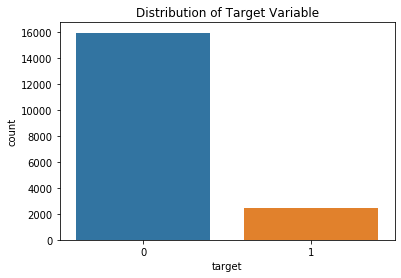

In [12]:
sns.countplot(HR_train['target']);
plt.title("Distribution of Target Variable");

In [13]:
HR_train.target.value_counts(normalize=True)*100

0    86.79122
1    13.20878
Name: target, dtype: float64

1. Looks like there is class imbalance in the target variable.
2. As we can see below, almost 87% of the values are of one class(0) and the rest are of another class(1).
3. So most of the candidates in the train data are not looking for a job change and few are looking for job change.

Text(0.5, 1.0, 'Training Hour plot')

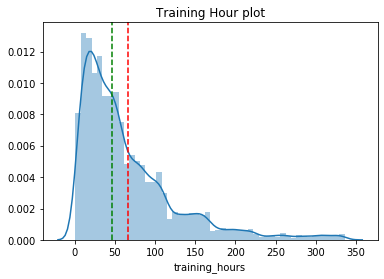

In [14]:
sns.distplot(HR_train.training_hours)
plt.axvline(x=HR_train.training_hours.mean(),color='r',linestyle='--')
plt.axvline(x=HR_train.training_hours.median(),color='g',linestyle='--')
plt.title('Training Hour plot')

####  <span style="font-family: Classic; font-weight:bold;font-size:1.2em;color:#EA0B42"> Inference:

1. Most of the students are trained in the range of 10-50 hours.
2. There are few students who are trained more than 150 hours. Once we pass 200 hours, the number of observations drops further.
3. From the above figure we can see the the mean is represented by the red line. The median is represented by the green line.
4. We can see from the above figure that 50% of the students are trained below 50 hours.
5. Have appreciable positive skewness.
6. The graph shows peakedness.

In [15]:
HR_train['city_development_index'].describe()

count    18359.000000
mean         0.847140
std          0.110189
min          0.448000
25%          0.796000
50%          0.910000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

1. Maximum city_development_index rating is 0.949, and minimum value is 0.448.
2. Median value is 0.91, so a lot of values are towards the right. the distribution is slightly right skewed. 
3. Average value of city_development index is 0.847, this is expected as most of the values are upwards of 0.90 and it drives the average towards that value.

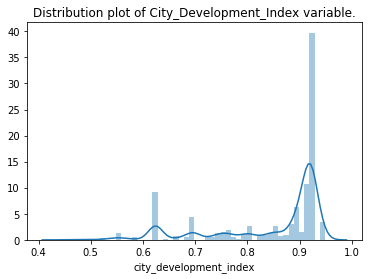

In [16]:
sns.distplot(HR_train['city_development_index']);
plt.title("Distribution plot of City_Development_Index variable.");

####  <span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#0e92ea"> Bivariate Analysis

Text(0.5, 1.0, 'Distribution of Target Variable by gender')

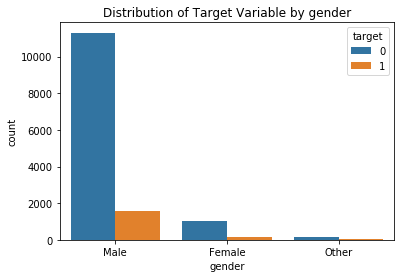

In [17]:
sns.countplot(x=HR_train.gender, hue=HR_train.target)
plt.title("Distribution of Target Variable by gender")

####  <span style="font-family: Classic; font-weight:bold;font-size:1.2em;color:#EA0B42"> Inference:

1. So most of the Male candidates in the train data are not looking for a job change.

Text(0.5, 1.0, 'Distribution of Target Variable by relevent experience')

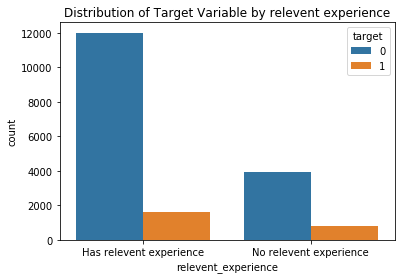

In [18]:
sns.countplot(x=HR_train.relevent_experience, hue=HR_train.target)
plt.title("Distribution of Target Variable by relevent experience")

####  <span style="font-family: Classic; font-weight:bold;font-size:1.2em;color:#EA0B42"> Inference:

1. Students who have relevent experiment are not looking for a job change.


Text(0.5, 1.0, 'Distribution of Target Variable by education level')

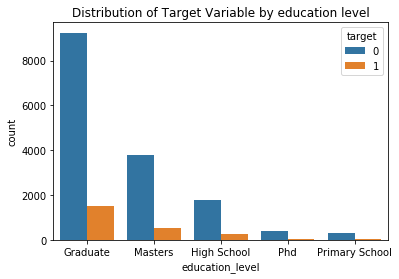

In [19]:
sns.countplot(x=HR_train.education_level, hue=HR_train.target)
plt.title("Distribution of Target Variable by education level")

####  <span style="font-family: Classic; font-weight:bold;font-size:1.2em;color:#EA0B42"> Inference:

1. Graduates are not looking for job change, followed by students who have completed their Masters.

### Treating missing values:

In [20]:
#Code to check the columns with number of missing values
HR_train.apply(lambda x: sum(x.isnull())/HR_train.shape[0]*100)

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    22.321477
relevent_experience        0.000000
enrolled_university        1.862847
education_level            2.489242
major_discipline          15.458358
experience                 0.321368
company_size              26.030830
company_type              27.447029
last_new_job               1.999020
training_hours             0.000000
target                     0.000000
dtype: float64

In [21]:
def experience_binning(x):
    if x<=5:
        return 'Low'
    elif (x>5 and x<=10):
        return 'Medium'
    elif (x>10 and x<=15):
        return 'High'
    else:
        return 'Very High'
    
def company_size_binning(x):
    if x=="<10":
        return "Low"
    elif x=="10-49":
        return "Low"
    elif x=="50-99":
        return "Low"
    elif x=="100-500":
        return "Low"
    elif x=="500-999":
        return "Low"
    elif x=="1000-4999":
        return "Medium"
    elif x=="5000-9999":
        return "Medium"
    elif x=="10000+":
        return "High"
    
def city_development_index_binning(x):
    if x<=0.75:
        return "Low"
    elif (x>0.75 and x<=0.90):
        return "Medium"
    else:
        return "High"

In [22]:
for df in (HR_train,HR_test):
    df['experience']=df['experience'].replace({"<1":"0",">20":"21"})
    df['experience'].fillna('20',inplace=True)
    df['experience']=df['experience'].astype(int)
    df['Experience_Binning'] = df['experience'].apply(experience_binning)
    
    df['company_size'].replace({"10/49":"10-49"},inplace=True)
    df['Company_Size_Binning'] = df['company_size'].apply(company_size_binning)
    
    df['City_Development_Index_Binning'] = df['city_development_index'].apply(city_development_index_binning)

In [23]:
def impute_missing(df,cols):
    
    #df[cols].apply(lambda x: x.fillna(x.mode().values[0], inplace=True))
    for x in cols:
        mode = df[x].mode().values[0]
        #mode = '99999'
        df[x].fillna(mode, inplace=True)

    return df
    

In [24]:
#Code to get the categorical columns of the dataset
categorial_features = HR_train.select_dtypes(include=[np.object]).columns
print('Categorical Features in the train dataset are:')
categorial_features

Categorical Features in the train dataset are:


Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type',
       'last_new_job', 'Experience_Binning', 'Company_Size_Binning',
       'City_Development_Index_Binning'],
      dtype='object')

In [25]:
HR_train = impute_missing(HR_train,categorial_features)

In [26]:
#Code to check the columns with number of missing values
HR_train.apply(lambda x: sum(x.isnull())/HR_train.shape[0]*100)

enrollee_id                       0.0
city                              0.0
city_development_index            0.0
gender                            0.0
relevent_experience               0.0
enrolled_university               0.0
education_level                   0.0
major_discipline                  0.0
experience                        0.0
company_size                      0.0
company_type                      0.0
last_new_job                      0.0
training_hours                    0.0
target                            0.0
Experience_Binning                0.0
Company_Size_Binning              0.0
City_Development_Index_Binning    0.0
dtype: float64

There are no more missing values in the train dataset.

### Treating Outliers

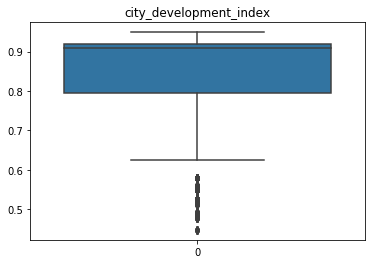

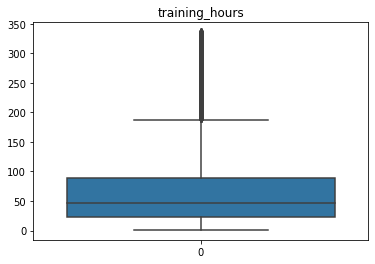

In [27]:
for i in ('city_development_index', 'training_hours'):
    sns.boxplot(data=HR_train[i])
    plt.title(i)
    plt.show()

In [28]:
x=df.describe()
x


,enrollee_id,city_development_index,experience,training_hours
count,15021.000000,15021.000000,15021.000000,15021.000000
mean,16643.004327,0.846683,10.568404,65.158179
std,9626.895233,0.109709,6.796377,59.719211
min,6.000000,0.448000,0.000000,1.000000
25%,8316.000000,0.794000,5.000000,23.000000
50%,16664.000000,0.910000,9.000000,47.000000
75%,24908.000000,0.920000,17.000000,89.000000
max,33378.000000,0.949000,21.000000,336.000000


In [29]:
for i in ('city_development_index', 'training_hours'):
    q1=x.loc["25%",i]
    q3=x.loc["75%",i]
    iqr = q3-q1
    uppl = q3+(1.5*iqr)
    lowl = q1-(1.5*iqr)
    print(q1,q3,iqr,uppl,lowl)
    HR_train[i] = HR_train[i].apply(lambda x: uppl if x>uppl else x)
    HR_train[i] = HR_train[i].apply(lambda x: lowl if x<lowl else x)

0.794 0.92 0.126 1.109 0.605
23.0 89.0 66.0 188.0 -76.0


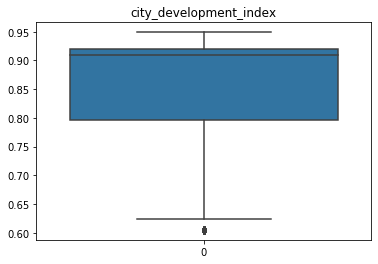

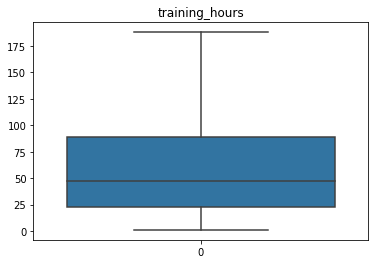

In [30]:
for i in ('city_development_index', 'training_hours'):
    sns.boxplot(data=HR_train[i])
    plt.title(i)
    plt.show()

In [31]:
df=pd.get_dummies(columns=categorial_features,drop_first=True,data=HR_train)

In [32]:
df.head()

,enrollee_id,city_development_index,experience,training_hours,target,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,city_city_109,city_city_11,city_city_111,city_city_114,city_city_115,city_city_116,city_city_117,city_city_118,city_city_12,city_city_120,city_city_121,city_city_123,city_city_126,city_city_127,city_city_128,city_city_129,city_city_13,city_city_131,city_city_133,city_city_134,city_city_136,city_city_138,city_city_139,city_city_14,city_city_140,city_city_141,city_city_142,city_city_143,city_city_144,city_city_145,city_city_146,city_city_149,city_city_150,city_city_152,city_city_155,city_city_157,city_city_158,city_city_159,city_city_16,city_city_160,city_city_162,city_city_165,city_city_166,city_city_167,city_city_171,city_city_173,city_city_175,city_city_176,city_city_179,city_city_18,city_city_180,city_city_19,city_city_2,city_city_20,city_city_21,city_city_23,city_city_24,city_city_25,city_city_26,city_city_27,city_city_28,city_city_30,city_city_31,city_city_33,city_city_36,city_city_37,city_city_39,city_city_40,city_city_41,city_city_42,city_city_43,city_city_44,city_city_45,city_city_46,city_city_48,city_city_50,city_city_53,city_city_54,city_city_55,city_city_57,city_city_59,city_city_61,city_city_62,city_city_64,city_city_65,city_city_67,city_city_69,city_city_7,city_city_70,city_city_71,city_city_72,city_city_73,city_city_74,city_city_75,city_city_76,city_city_77,city_city_78,city_city_79,city_city_8,city_city_80,city_city_81,city_city_82,city_city_83,city_city_84,city_city_89,city_city_9,city_city_90,city_city_91,city_city_93,city_city_94,city_city_97,city_city_98,city_city_99,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_size_100-500,company_size_1000-4999,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never,Experience_Binning_Low,Experience_Binning_Medium,Experience_Binning_Very High,Company_Size_Binning_Low,Company_Size_Binning_Medium,City_Development_Index_Binning_Low,City_Development_Index_Binning_Medium
0,23798,0.689,3,106.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0
1,29166,0.923,14,69.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,46,0.910,6,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0
3,18527,0.666,14,26.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
4,21751,0.8

In [33]:
X=df.drop(['enrollee_id','target'],axis=1)
y=df.target

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,roc_curve,auc

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

In [36]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1')) 
#Penalty is there for Logistic Regression not for Linear Regression
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l1',
                                             random_state=None, solver='warn',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [39]:
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 163
selected features: 155
features with coefficients shrank to zero: 8


In [40]:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['city_city_131', 'city_city_140', 'city_city_16', 'city_city_44',
       'city_city_90', 'Company_Size_Binning_Medium',
       'City_Development_Index_Binning_Low',
       'City_Development_Index_Binning_Medium'],
      dtype='object')

In [41]:
forest = RandomForestClassifier(random_state = 1)
modelF = forest.fit(X_train, y_train)
y_predF = modelF.predict(X_test)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [42]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [43]:
accuracy_score(y_predF,y_test)
print('Train Score',modelF.score(X_train,y_train))
print('Test score',modelF.score(X_test,y_test))

Train Score 0.9758773636292896
Test score 0.8582062454611474


In [44]:
forestVC = RandomForestClassifier(random_state = 1,
                                  n_estimators = 200,
                                  max_depth = 6, 
                                  min_samples_split = 7,  min_samples_leaf = 5) 
modelVC = forestVC.fit(X_train, y_train) 
y_predVC = modelVC.predict(X_test)

In [45]:
print('Train Score',forestVC.score(X_train,y_train))
print('Test score',forestVC.score(X_test,y_test))

Train Score 0.8653801260602287
Test score 0.8738198983297023


In [46]:
#The first index refers to the probability that the data belong to class 0, 
#and the second refers to the probability that the data belong to class 1.
forestVC.predict_proba(X_test) 

array([[0.90437927, 0.09562073],
       [0.88004554, 0.11995446],
       [0.86917296, 0.13082704],
       ...,
       [0.8635805 , 0.1364195 ],
       [0.90111512, 0.09888488],
       [0.88330919, 0.11669081]])

In [47]:
np.where( forestVC.predict_proba(X_test)[:,1]>0.5,1,0)

array([0, 0, 0, ..., 0, 0, 0])

Text(0.5, 0, 'False positive rate')

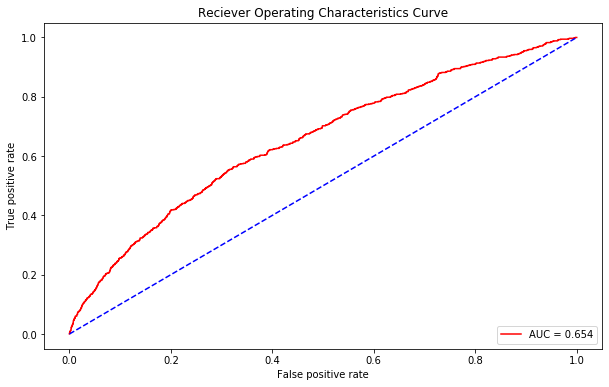

In [50]:
probability = forestVC.predict_proba(X_test)[:,1]
fpr,tpr, threshold = roc_curve(y_test,probability)
roc_auc_ = auc(fpr,tpr)

plt.figure(figsize=(10,6))
plt.title('Reciever Operating Characteristics Curve')
plt.plot(fpr,tpr,'r',label = 'AUC = %0.3f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

In [ ]:
kf = StratifiedKFold(n_splits=5,shuffle=False,random_state=42)
pred_test_full = np.zeros(HR_test.shape[0])
cv_score =[]
i=1
for train_index,test_index in kf.split(X,y):
    X_Train,X_Val = X.loc[train_index],X.loc[test_index]
    y_Train,y_Val = y.loc[train_index],y.loc[test_index]
    
    #model
    cls = RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=42,class_weight='balanced',max_features=0.5,max_depth=6,min_samples_leaf=7,min_samples_split=5)
    cls.fit(X_Train,y_Train)
    
    score_train = roc_auc_score(y_Train,cls.predict_proba(X_Train)[:,1])
    score_val = roc_auc_score(y_Val,cls.predict_proba(X_Val)[:,1])
    print('{} of KFold {}'.format(i,kf.n_splits))
    print('Training ROC AUC score:',score_train)
    print('Validation ROC AUC score:',score_val)
    print("-----------------------------------")
    cv_score.append(score_val)    
    pred_test_full += cls.predict_proba(HR_test)[:, 1] / kf.n_splits
    i+=1
print ("Mean Cross Validation ROC AUC Score:{}".format(np.array(cv_score).mean()))

In [ ]:
df.city_city_33.value_counts()